In [81]:
wordlist = ['azerty','qsjozvijrml','qsdf']
row1 = 'azerttyuiop'
row2 = 'qsdfghjklm'
row3 = 'wxcvbn,;:'

dict_rows =dict({1:row1,2:row2,3:row3})
allowed_rownrs = [1,2,3]
def check_one_row(wordlist: list, allowed_rownrs= [1,2,3]):     
    return [check_one_word(word,allowed_rownrs) for word in wordlist]

def check_one_word(word: str,allowed_rownrs= [1,2,3]):     
    for rownr in allowed_rownrs:
        if all([ letter in dict_rows[rownr] for letter in word.lower()]):
            return word


In [82]:
check_one_row(['Azerty','qfsqsg','nee'],allowed_rownrs=[1,2])

['Azerty', 'qfsqsg', None]

In [72]:
[ letter in dict_rows[1] for letter in 'Azerty'.lower()]

[True, True, True, True, True, True]

In [43]:
dict_rows[1] 

['azerttyuiop']

In [73]:
wordlist = [ 'candy', 'fart', 'pop', 'Zelda', 'flag', 'typewriter', 'tuin' ]
check_one_row(wordlist)

[False, False, True, False, False, False, False]

In [31]:

def trimArray( arr, pop_begin, pop_end):
    if pop_end==0:
        return arr[pop_begin:]
    else: 
        return arr[pop_begin:-pop_end]

print(trimArray([1, 2, 3, 4, 5, 6], 2, 1))
#> [3, 4, 5]
print(trimArray([1, 7], 0, 0))
print(trimArray([6, 2, 4, 3, 7, 1, 3], 5, 0))

[3, 4, 5]
[1, 7]
[1, 3]


In [34]:
trimArray = lambda arr, pop_begin, pop_end : arr[pop_begin:-pop_end] if pop_end>0 else arr[pop_begin:]


print(trimArray([1, 2, 3, 4, 5, 6], 2, 1))
#> [3, 4, 5]
print(trimArray([1, 7], 0, 0))
print(trimArray([6, 2, 4, 3, 7, 1, 3], 5, 0))
 

[3, 4, 5]
[]
[]


In [4]:
arr =[1, 2, 3, 4, 5, 6]

In [9]:
b=arr.pop(-3:)
print(arr)

SyntaxError: invalid syntax (1211463007.py, line 1)

In [1]:
a ="[]"
b = "[1,2,3,4,5]"
c= '[{"a": []}, ["abc"]]'
sol = {a:1,b:1,c:3}
def depthjson(inputstr):
    if type(inputstr) is not str:
        encoder=json.JSONEncoder()
        inputstr = encoder.encode(inputstr)

    counter=0
    max_counter= 0
    for item in inputstr:
        if item in '([{': counter += 1  
        if item in ']})':  counter -= 1 
        if counter >max_counter: max_counter = counter 
    return max_counter

for el in sol.keys():
    outpustr=' Depthsjon(',el,') gives:',depthjson(el), ' '*10,'(should equal ', sol[el],')'
    print(*outpustr)
    
    
    
import json
test=json.JSONEncoder()
output = test.encode([{"a": []}, ["abc"]])
print(*output,sep =' ')

 Depthsjon( [] ) gives: 1            (should equal  1 )
 Depthsjon( [1,2,3,4,5] ) gives: 1            (should equal  1 )
 Depthsjon( [{"a": []}, ["abc"]] ) gives: 3            (should equal  3 )
[ { " a " :   [ ] } ,   [ " a b c " ] ]


In [27]:
print(*output,sep =' ')

[ { " a " :   [ ] } ,   [ " a b c " ] ]


In [31]:
depthjson("[[],[{'':''}]]")

3

In [2]:
a_= eval(a)
b_= eval(b)
c_= eval(c)

In [5]:
print(b_)

[1, 2, 3, 4, 5]


In [30]:
def step_through(struct, depth =0):
    print(type(struct), depth)
    if type(struct) is int or type(struct) is str:
        return max(depth,1)
    else:
        dephts_= [depth]
        for f in struct:
            dephts_.append(step_through(f, depth+1))
        return max(dephts_)


In [32]:
step_through([1,[2,{24,1}],1,[0]], depth =0)

<class 'list'> 0
<class 'int'> 1
<class 'list'> 1
<class 'int'> 2
<class 'set'> 2
<class 'int'> 3
<class 'int'> 3
<class 'int'> 1
<class 'list'> 1
<class 'int'> 2


3

In [34]:
in_array= ['a','b','e']
import numpy as np

def fill_missing(in_array):
    ar_diff=np.diff(list(map(ord,in_array)))
    out_array=[]
    for pos, n in enumerate(ar_diff):
        while n>1:
            n-=1
            out_array.append(chr(65+pos+n).lower())
    return out_array
print(fill_missing(in_array))

['d', 'c']


In [35]:
missingLetters = lambda ar: [e for i, e in enumerate("abcdefghijklmnopqrstuvwxyz") if e not in ar and "abcdefghijklmnopqrstuvwxyz".index(ar[0]) < i < "abcdefghijklmnopqrstuvwxyz".index(ar[-1])]
print(missingLetters(in_array))

['c', 'd']


In [4]:
%run sol_2015_14.py

TypeError: cannot use a string pattern on a bytes-like object

In [11]:
import lorem 
textarray = lorem.get_sentence(count=1, comma=(0, 2), word_range=(4, 50), sep=' ').split(' ')

In [15]:
#textarray = ['This', 'is', 'an', 'example', 'of', 'text', 'justification.']

import numpy as np

separator = '_'
def justifyText(textarray,width=16):
    lengths = [len(word)+1 for word in textarray]
    len_incl_space = np.cumsum(lengths)
    if len_incl_space[-1]<=width:  # if everything will fit;
        pad_txt(textarray,width)
    else: # only part will fit one one line.
        will_fit = np.where(len_incl_space>width)[0][0]-1
        pad_txt(textarray[:will_fit+1],width)
        if will_fit < len(textarray):
            justifyText(textarray[will_fit+1:],width)
        return
    

def pad_txt(textarray, width): # process one line
    text = separator.join(textarray)
    ngaps = len(textarray)-1
    to_add = width-len(text)-1    
    if to_add>0:
        if ngaps<=1:
            to_add_in_each =0
            add_in_one_gap =to_add
            textarray[0] +=separator*add_in_one_gap
        else:
            to_add_in_each =to_add//ngaps
            add_in_one_gap= to_add%ngaps
            if  add_in_one_gap >0:
                i =0
                while add_in_one_gap >0:
                    textarray[i] +=separator*1
                    add_in_one_gap -= 1
                    i = ((i+1) - ngaps)%ngaps

                # textarray[0] +=separator*add_in_one_gap
                    
        #print('one: ', add_in_one_gap)
        #print('all: ', to_add_in_each)
        text = (separator*(1+to_add_in_each)).join(textarray)
    print('|',text,'|',sep="")
    #print(list(map(len,textarray)))
    
justifyText(textarray, 50)
print()
justifyText(textarray, 40)


|Do__aliqua_tempor_ex_laborum_et_voluptate_aliquip|
|officia__ea__nulla_sunt_dolor_cupidatat_nisi_anim|
|eiusmod___ut__cillum__nostrud__laboris__elit__sed|
|ullamco___ipsum___enim___fugiat___id,__adipiscing|
|exercitation__velit__esse_irure_occaecat_deserunt|
|mollit__ad__culpa__proident__minim__amet__in_duis|
|dolore_______quis_______aute_______eu______lorem.|

|Do___aliqua___tempor___ex___laborum__et|
|voluptate_aliquip_officia_ea_nulla_sunt|
|dolor__cupidatat__nisi__anim_eiusmod_ut|
|cillum_nostrud_laboris_elit_sed_ullamco|
|ipsum___enim___fugiat___id,__adipiscing|
|exercitation__velit_esse_irure_occaecat|
|deserunt_mollit_ad_culpa_proident_minim|
|amet_in_duis_dolore_quis_aute_eu_lorem.|


In [36]:
a = 12
b = 5
print(a%b)
print(a //b)

2
2


In [47]:
'bla'+'test'

'blatest'

In [48]:
!pip install python-lorem


The system cannot find the path specified.


In [13]:
print(textarray)

['Cillum', 'tempor', 'deserunt', 'incididunt', 'adipiscing', 'labore', 'nulla', 'occaecat', 'veniam', 'fugiat', 'elit', 'dolore', 'quis', 'aliquip', 'ullamco', 'officia', 'qui', 'aliqua', 'in', 'ex', 'consectetur', 'ad', 'sint', 'excepteur', 'sit', 'reprehenderit', 'magna', 'irure', 'id', 'aute', 'cupidatat', 'ut', 'eiusmod', 'non', 'exercitation', 'commodo', 'do', 'sunt', 'et', 'lorem,', 'proident', 'amet', 'est', 'nostrud', 'nisi', 'sed', 'eu', 'mollit', 'enim', 'ea', 'minim.']


In [56]:
from collections import Counter
import numpy as np
inputstr = 'blabla' 
 
explodestring = lambda inputstr : np.sort([letter*count for letter, count in Counter(inputstr).items() if letter not in [' ']])

print(explodestring(inputstr))

['aa' 'bb' 'll']


In [26]:
a ->2

SyntaxError: invalid syntax (1883152702.py, line 1)

In [39]:
resultdict


Counter({'b': 2, 'l': 2, 'a': 2})

In [53]:
for (a,b) in resultdict.items():
    print(b,a)

2 b
2 l
2 a


In [8]:
inputstr = ["bla and blabla! /\\ **"]

print(inputstr[0])

bla and blabla! /\ **


In [328]:
:

{32, 47, 92, 97, 98, 100, 108, 110}

In [9]:
from collections import Counter; import numpy as np;

explodestring = lambda inputstr : np.sort([letter*count for letter, count in Counter(inputstr).items() if letter not in [' ']])

print(explodestring(inputstr))

['bla and blabla! /\\ **']


In [10]:

def explodestring(str: inputstr): 
    ''' convoluted way!
    '''
    temp =list(map(chr,np.sort(list(map(ord,*inputstr)))))
    splits = np.diff(list(map(ord,temp)))>0
    word,output  = [],[]
    for c,l in enumerate(temp):
        if splits[c-1] and len(word)>0:
            output.append(''.join(word))
            word = []
        if l not in ['',' ']:
            word.append(l)
    else:
        output.append(''.join(word))
    return output

explodestring(inputstr)

['!', '**', '/', '\\', 'aaaa', 'bbb', 'd', 'lll', 'n']

In [5]:
old =''

abr = list(map(chr,sorted(list(map(ord,*inputstr)))))

''.join([ abr[k] if ((abr[k] == abr[k+1]) ) else  (abr[k] + ' ') for k in range(len(abr)-1)]).strip().split(' ')
#and  abr[k] is not in [' '] 
#abr[-1]

['!', '**', '/', '\\\\', 'aaaa', 'bbb', 'd', 'lll']

In [13]:
import re  

str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
tuples = re.findall(r'([\w\.-]+)@([\w\.-]+)', str)
print(tuples)  ## [('alice', 'google.com'), ('bob', 'abc.com')]
for tuple in tuples:
    print(tuple[0])  ## username
    print(tuple[1])  ## host


[('alice', 'google.com'), ('bob', 'abc.com')]
alice
google.com
bob
abc.com


In [7]:
temp = (''.join([l for c,l in enumerate(onelinered(inputstr)) ])).strip()
print(temp)

NameError: name 'onelinered' is not defined

In [338]:
import re

In [28]:
#re.(inputstr)
inputstr = 'kfjsdfjsf j sk fjkjf "!!èé!çè'
charvals  = list(map(ord,inputstr))
calculate  = lambda inputstr: ''.join([ ( chr(ordval)*sum(charvals==ordval)+' ') if (sum(charvals==ordval) > 0) else ('') for ordval in np.arange(33,155,1) ])

calculate(inputstr)

'!!! " d fffff jjjjj kkk sss '

In [349]:

longexpl = lambda inputstr : ''.join([ dict(enumerate(list(map(chr,np.sort(list(map(ord,*inputstr)))))))[k] if ((dict(enumerate(list(map(chr,np.sort(list(map(ord,*inputstr)))))))[k] == dict(enumerate(list(map(chr,np.sort(list(map(ord,*inputstr)))))))[k+1]) ) else  (dict(enumerate(list(map(chr,np.sort(list(map(ord,*inputstr)))))))[k] + ' ') for k in range(len(dict(enumerate(list(map(chr,np.sort(list(map(ord,*inputstr))))))))-1)]).strip().split(' ')
longexpl(inputstr)
#and  abr[k] is not in [' '] 
#abr[-1]

['!', '**', '/', '\\', 'aaaa', 'bbb', 'd', 'lll']

In [29]:
import re
thepattern= 'a*'
sum(1 for m in re.finditer(thepattern, thestring))

TypeError: ord() takes exactly one argument (29 given)

In [54]:

pattern = '[[a][^a]*]?'
inputstr = 'bla blaakljkfa\+ _ '
tuples = [(chr(letterval), sum([1 for _ in re.finditer('[['+chr(letterval)+'][^'+chr(letterval)+']*]?', inputstr)])) for letterval in np.arange(ord('_'),ord('z'),1)]


print(tuples)

[('_', 1), ('`', 0), ('a', 4), ('b', 2), ('c', 0), ('d', 0), ('e', 0), ('f', 1), ('g', 0), ('h', 0), ('i', 0), ('j', 1), ('k', 2), ('l', 3), ('m', 0), ('n', 0), ('o', 0), ('p', 0), ('q', 0), ('r', 0), ('s', 0), ('t', 0), ('u', 0), ('v', 0), ('w', 0), ('x', 0), ('y', 0)]


In [359]:
[lambda a: (b := a+1)(a) for a in range(2)]

[<function __main__.<listcomp>.<lambda>(a)>,
 <function __main__.<listcomp>.<lambda>(a)>]

In [378]:
[(lambda y: [x,y, x/y])(x+1) for x in range(5)]

[[0, 1, 0.0],
 [1, 2, 0.5],
 [2, 3, 0.6666666666666666],
 [3, 4, 0.75],
 [4, 5, 0.8]]

In [389]:
 inputstr = 'bla en blabla &jkq*'
 ''.join([(lambda abr,y: (abr[x] if abr[y]==abr[x]  else abr[x]+' '))(abr:=list(map(chr,sorted(list(map(ord,inputstr))))),x+1) for x in range(len(inputstr)-1) ]).strip()

'& * aaa bbb e j k lll n'

In [50]:
import numpy as np
stock =      [7,1,5,3,6,4]
# 5 // Buy on day 2, and sell on day 5, your profit = 6-1 = 5.
maximumProfit = lambda stock: print('{} profit by buying at day {} and selling at day {}'.format(max(max(list_of_poss_profit_:=[max(stock[j:])-stock[j] for j in range(len(stock)-1)]),0), buyday:=1+np.argmax(list_of_poss_profit_),buyday+1+np.argmax([val-stock[buyday] for val in stock[buyday:]])))
maximumProfit(stock)



5 profit by buying at day 2 and selling at day 5


In [32]:
import numpy as np
import matplotlib.pyplot as plt


In [54]:

import itertools 
from collections import Counter


74


finishes on floor  74
cellar visited at turn [1795, 1797, 1799, 1803, 6595]


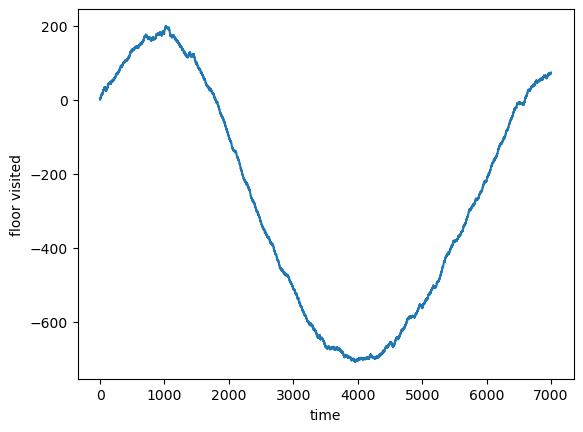

In [68]:
import numpy as np
import matplotlib.pyplot as plt

#day 1a
inputstr = '((((()(()(((((((()))(((()((((()())(())()(((()((((((()((()(()(((()(()((())))()((()()())))))))))()((((((())((()))(((((()(((((((((()()))((()(())()((())((()(()))((()))()))()(((((()(((()()))()())((()((((())()())()((((())()(()(()(((()(())(()(())(((((((())()()(((())(()(()(()(())))(()((((())((()))(((()(()()(((((()()(()(((()(((((())()))()((()(()))()((()((((())((((())(()(((())()()(()()()()()(())((((())((())(()()))()((((())))((((()())()((((())((()())((())(())(((((()((((()(((()((((())(()(((()()))()))((((((()((())()())))(((()(()))(()()(()(((()(()))((()()()())((()()()(((())())()())())())((()))(()(()))(((((()(()(())((()(())(())()((((()())()))((((())(())((())())((((()(((())(())((()()((((()((((((()(())()()(()(()()((((()))(())()())()))(())))(())))())()()(())(()))()((()(()(())()()))(()())))))(()))(()()))(())(((((()(()(()()((())()())))))((())())((())(()(())((()))(())(((()((((((((()()()(()))()()(((()))()((()()(())(())())()(()(())))(((((()(())(())(()))))())()))(()))()(()(((((((()((((())))())())())())()((((((((((((((()()((((((()()()())())()())())())(())(())))())((()())((()(()))))))()))))))))))))))))())((())((())()()))))))(((()((()(()()))((())(()()))()()())))(())))))))(()(((())))())()())))()()(())()))()(()))())((()()))))(()))))()))(()()(())))))))()(((()))))()(()))(())())))))()))((()))((()))())(())))))))))((((())()))()))()))())(())()()(())))())))(()())()))((()()(())))(())((((((()(())((()(((()(()()(())))()))))))()))()(()((()))()(()))(()(((())((((())())(())(()))))))))())))))))())())))))())))))()()(((())()(()))))))))())))))(())()()()))()))()))(()(())()()())())))))))())()(()(()))))()()()))))())(()))))()()))))()())))))(((())()()))(()))))))))))()()))))()()()))))(()())())()()())()(()))))()(()))(())))))))(((((())(())())()()))()()))(())))))()(()))))(())(()()))()())()))()))()))()))))())()()))())())))(()))(()))))))())()(((())()))))))))()))()())))())))())))()))))))))))()()))(()()))))))(())()(()))))())(()))))(()))))(()())))))())())()()))))())()))))))))(()))))()))))))()(()())))))))()))())))())))())))())))))))())(()()))))))(()())())))()())()))))))))))))))())))()(())))()))())()()(())(()()))(())))())()())(()(()(()))))())))))))))))())(()))()))()))))(())()())()())))))))))))()()))))))))))))())())))))(()())))))))))))())(())))()))))))))())())(()))()))(())))()))()()(())()))))))()((((())()))())())))))()))()))))((()())()))))())))(())))))))))))))))))()))))()()())()))()()))))())()))((()())))())))(()))(()())))))))()))()))))(())))))))(())))))())()()(()))())()))()()))))())()()))))())()))())))))))(()))))()())()))))))))(()))())))(()))()))))(())()))())())(())())())))))))((((())))))()))()))()())()(())))()))()))()())(()())()()(()())()))))())())))))(()))()))))())(()()(())))))(())()()((())())))))(())(())))))))())))))))))()(())))))))()())())())()(()))))))))(()))))))))())()()))()(()))))))()))))))())))))))(())))()()(())()())))))(((())))()((())()))())))(()()))())(())())))()(((()())))))()(()()())))()()(()()(()()))())()(()()()))())()()))()())(()))))())))))())))(())()()))))(()))))(())(()))(())))))()()))()))))())()))()()(())())))((()))())()))))))()()))))((()(()))))()()))))))())))))())(()((()())))))))))))()())())))()))(()))))))(()))(())()())))(()))))))))())()()()()))))(()())))))))((())))()))(()))(())(())()())()))))))))(())))())))(()))()()))(()()))(()))())))()(())))())((()((()(())))((())))()))))((((())())()())))(())))()))))))())(()()((())))())()(()())))))(()())()))())))))))((())())))))))(()(()))())()()(()()(((()(((()())))))()))))))()(())(()()((()()(())()()))())()())()))()())())())))))))(((())))))))()()))))))(((())()))(()()))(()()))))(()(()()((((())()())((()()))))(()(())))))()((()()()())()()((()((()()))(()))(((()()()))(((())))()(((())()))))))((()(())())))(()())(((((()(()))(()((()))(()())()))))(()(()))()(()))(())(((())(()()))))()()))(((()))))(()()()()))())))((()()()(())()))()))))()()))()))))))((((((()()()))))())((()()(((()))))(()(())(()()())())())))()(((()()))(())((())))(()))(()()()())((())())())(()))))()))()((()(())()(()()(())(()))(())()))(())(()))))(())(())())(()()(()((()()((())))((()))()((())))(((()()()()((((()))(()()))()()()(((())((())())(()()(()()()))()((())(())()))())(((()()(())))()((()()())()())(()(())())(((())(())())((())(())()(((()()))(())))((())(()())())(())((()()()((((((())))((()(((((())()))()))(())(()()))()))(())()()))(())((()()())()()(()))())()((())))()((()()())((((()())((())())())((()((()))()))((())((()()(()((()()(((())(()()))))((()((())()(((())(()((())())((())(()((((((())())()(()())()(())(((())((((((()(())(()((()()()((()()(()()()())))()()(((((()()))()((((((()))()(()(()(()(((()())((()))())()((()))(())))()))()()))())()()))())((((())(()(()))(((((((())(((()(((((()(((()()((((())(((())())))(()()()(()(()))()))((((((()))((()(((()(())((()((((()((((((())(((((())))(((()(()))))(((()(((())()((())(()((()))(((()()(((())((((()(()(((((()))(((()(((((((()(()()()(()(()(()()())(())(((((()(())())()())(()(()(()))()(()()()())(()()(()((()))()((())())()(()))((())(()))()(()))()(((()(()(()((((((()()()()())()(((((()()(((()()()((()(((((()))((((((((()()()(((((()))))))(()()()(())(()))(()()))))(())()))(((((()(((((()()(()(()())(((()))((((()((()(()(()((()(()((())))()(((()((()))((()))(((((((((()((()((()(())))()((((()((()()))((())(((()(((((()()(()(()()((()(()()()(((((((())())()())))))((((()()(()))()))(()((())()(()(((((((((()()(((()(()())(()((()())((())())((((()(((()(((()((((()((()((((()(()((((((())((((((((((((()()(()()((((((((((((((()((()()))()((((((((((((())((((()(()())((()(()(()))()(((((()()(((()()))()())(())((()(((((()((())(((((()((()(((((()))()()((((())()((((())(((((((((()(())(()(())))())(()((())(((())(())(())())(()(()(())()()((()((())()(((()(((((()(())))()(((()((())))((()()()(((()(((()((()(()(())(()((()())(()(()(((()(((((((((())(()((((()()))(()((((()()()()(((()((((((((()(()()((((((()(()()(()((()((((((((((()()(((((((()())(())))(((()()))(((((()((()()())(()()((((())((()((((()))))(())((()(()()(((()(()(((()((((()(((((()))())())(()((())()))(((()())((())((())((((()((()((((((())(()((((()()))((((((())()(()))((()(((())((((((((((()()(((((()(((((()((()()()((((())))(()))()((()(())()()((()((((((((((()((())(())(((((()(()(()()))((((()((((()()((()(((()(((((((((()(()((()((()))((((((()(((())()()((()(((((((()())))()()(()((()((()()(((()(()()()()((((()((())((((()(((((((((()(((()()(((()(()(((()(((()((())()(()((()(()(()(()))()(((()))(()((((()((())((((())((((((())(()))(()((((())((()(()((((((((()()((((((()(()(()()()(())((()((()()(((()(((((((()()((()(((((((()))(((((()(((()(()()()(()(((()((()()((())(()(((((((((()(()((()((((((()()((())()))(((((()((())()())()(((((((((((()))((((()()()()())(()()(()(()()))()))(()))(()(((()()))())(()(()))()()((())(()())()())()(()))()))(()()(()((((((())((()(((((((((((()(())()((()(()((()((()(()((()((((((((((()()())((())()(())))((())()())()(((((()(()())((((()((()(())(()))(((())()((()))(((((())(()))()()(()))(((())((((()((((()(())))(((((((()))))())()())(())((())()(()()((()(()))()(()()(()()((()())((())((()()))((((()))()()))(()()(())()()(((((()(())((()((((()))()))(()())())(((()()(()()))(())))))(()))((())(((((()((((()))()((((()))()((())(((())))(((()())))((()(()()(('
def solve2015_day1a(inputstr):
    count = Counter(inputstr)
    return print('finishes on floor ',count['(']-count[')'])

def solve2015_day1b(inputstr):
    floors_visited= []
    visits_cellar = []
    pos =0
    for n,i in enumerate(inputstr):
        if i ==')':
            pos += -1
        else:
            pos += +1
        floors_visited.append(pos)
        if pos ==-1:
            visits_cellar.append(n+1)
    plt.plot(floors_visited)
    plt.xlabel('time')
    plt.ylabel('floor visited')

    return print('cellar visited at turn',visits_cellar)
            
solve2015_day1a(inputstr)
solve2015_day1b(inputstr)

In [2]:
from tqdm.auto import tqdm
import time
for i in tqdm(range(10)):
    time.sleep(1)
    pass

  0%|          | 0/10 [00:00<?, ?it/s]

In [20]:
blocks ={"####"

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##
def aoc_2022_17(input):
    return


    

"0039"


In [72]:
import numpy as np

filehandle = 'C:\\Users\\joachim.verhelst\\AoC\\2015_2.txt'


def parser_2015_2(filehandle):
    tuplelist=[]
    with open(filehandle) as f:
        lines = f.readlines()
    for line in lines:
        vals = line.split('x')
        tuplelist.append(tuple(map(int,vals)))    
    return tuplelist

def calc_2015_2_a(tuplelist):
    area = 0
    for (a,b,c) in tuplelist:
        area += (a*b+b*c+c*a)*2 + np.min([a*b,b*c,c*a])
    return area

def calc_2015_2_b(tuplelist):
    length = 0
    for (a,b,c) in tuplelist:
        length += (a*b*c) + 2*np.min([a+b,b+c,c+a])
    return length
tuplelist= parser_2015_2(filehandle)
#print(tuplelist)
print('a',calc_2015_2_a(tuplelist))
print('b',calc_2015_2_b(tuplelist))
print('b',calc_2015_2_b([(1,1,10)]))

a 1586300
b 3737498
b 14


In [73]:
#!pip install py3dbp
from py3dbp import Packer, Bin, Item,Painter
import time
from tqdm.auto import tqdm
#  add item

# init packing function
packer = Packer()

#  init bin

box1 = Bin(
    partno='example',         # partno / PN of item (unique value)
    WHD=(150,150,150),    # (width , height , depth)
    max_weight=999999,     # box can bear the weight
    corner=15             # container coner
)
packer.addBin(box1)  


for n,WLH in tqdm(enumerate(tuplelist)):
    item = Item(
    partno='item'+'{:04d}'.format(n), # partno / PN of item (unique value)
    name='item'+'{:04d}'.format(n), # partno / PN of item (unique value),
    typeof='cube',     # cube or cylinder
    WHD=WLH,  # (width , height , depth)
    weight=1,         # item weight
    level=1,           # priority (Item need to pack)
    loadbear=1,      # item bearing
    updown=False,       # item fall down or not
    color='#FFFF37'    # set item color , you also can use color='red' or color='r'
        )
    packer.addItem(item) 



0it [00:00, ?it/s]

In [74]:
print('passed, now packing...')
# calculate packing 
packer.pack(
    bigger_first=False,
    distribute_items=False,
    check_stable=False,
    
)
print('done!')

passed, now packing...
done!


In [79]:
from py3dbp import Painter
# paint the results

painter = Painter(packer.bins[0])

print('showing')
plt.Figure()

plt.show()

plt.savefig("packed_next.png")

showing


<Figure size 640x480 with 0 Axes>

In [69]:
sum([a*b*c for (a,b,c) in tuplelist])**(1/3)

154.53543871338763

In [70]:
names =[]
for i in range(1451):
    names.append(packer.bins[0].items[i].partno)

from collections import Counter
print(Counter(names))


IndexError: list index out of range

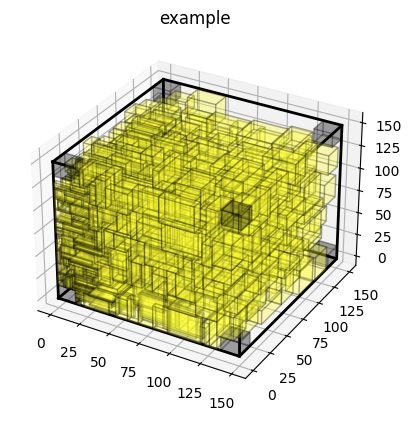

<Figure size 640x480 with 0 Axes>

In [80]:
from py3dbp import Painter
# paint the results

painter = Painter(packer.bins[0])
for b in packer.bins:
    fig = painter.plotBoxAndItems(
        title=b.partno,
        alpha=0.2,         
        write_num=False,   
        fontsize=10        
    )

fig.show()
plt.savefig("packed_trial.png")


In [ ]:
%matplotlib Qt5Agg

In [82]:
print(roomvol:=150*150*150)
print(occupied:=sum([a*b*c for (a,b,c) in tuplelist]))
print(occupied/roomvol)


3375000
3690492
1.093479111111111


{'^': (1+0j), 'v': (-1+0j), '<': -1j, '>': 1j}


In [57]:
from collections import Counter
# 2015 /3

inputstr='^><^>>>^<^v<v^^vv^><<^<><<vv^<>^<^v>^vv<>v><vv^^<>>^^^v<<vv><<^>^<^v<^>^v><<<v^<v<<<v<<vv<v<^><^>><>v>v^<<v^^<^v<><^>^<<^^^>v>>v^^<v>>^>vv><v>>^>>v^>^v>^<^^v>^>^^v<v>^^<v<>>v^^v><^><^<<>v^<^<^v<v>v^>>>v^v^>^<>^v<^^vv<v>^>^<>^^<vv^<><<v<^<^^>vv<>^>v<^>^v>v^>^v<>^><>><vv<>v^v<><>v^v>>>>v^^>^><^^<v<^><^<v>>^v^v<>v<<<^<<vvvv<<v^vv^>v^^^<^^^<v>>v<^v>>>>>v<^^^^>v<^<><v>>>>><v>>v^vvvv^^<v^<>^v<^v^>v><^>^v<<>>vv^>v>v^^>vv^<^vvv<>><>><><^^^<v<>^<^^^<v><^v>>v>^v<v^vv^<>^^^>v^^^v>>^v^^<^>>^>^<<v>>>^^<>>^vv>v^<^>>>><v<><><^^v<><<<<^^<>>^<vvv^><>v<v<<<<><v<<v>v<v^><vv<v^>^<^>v^^><^v>^^>v<>^v^<>^vv^><v^^vv>vvv>v>^<vv^>>^>>^>><>>>^^^^v<vv>^<>v^^><v^>^<>v<^^v><v<<><^v><>^^^^^v^v>>^^v><<><<vv>^^^^><^>v>><<<^v>v^^>^v^<^^v>v<^<<>>^v<<<v<<>>v<^v^><vv<v^v>v^<v>><v>^v<<<vv^>v<v>>v>>v><v><v^>v^^v>^v^>>>><>^>v>^v^>>>>v^<<vv<^v><<>v<v^<^^<<v<^v^^v^>vv><vv<v^<^>><^^>^<><^^<v<><^v^v^<^^>^<v><^<v>v^<<<^^v<v>^v>>><>^^>vv<<^v^<<<<^^>>>v>v<<<>^^>>>v>^>v>vv<<>^<^><v^>^^<^<v<<v<^>>^v^<vvv><>v^><<v>^^<v^vv^^^<vvv^<^>^>vv>><^v<^<<v<><<><<^^<><><vv>v>^<v>>^<>>^^v>vv^<^^v>><^vv^<<v^^><<>vv<v<><v<><v^^^v^v>^v<^<>v^^>><>^<^<v^<v^v^>v<<<^<<^>>>^^<^^v>v^<v>vvvv>v<>><^>^<<<<v^<v<>v^^^v<>v>^<v<<^^v^^<>^<<v^^<^<v>v>>v>>v^>^<vv<<<<<^<><>v><>>>v^>^v<^<><<v<^v^^<^<><^>^^^>^><>^><<vv>^<>vv<<v^v<<<<<>>>v<vv>^v>^>^>^<^><>v<><>>>^^<v>^<^v>>^<><v^><v^>>>v<v^^vvv^><v<v>v^>vvvv>>><^>v<>^^^>v>>v^<v<>v^>^<v^>^<<^>^>>v<<><<v^^>>v^<v^<^v^>^>v^><<^<v>v^<v>>^^<<v>v><<<^v^<>^<>^>>^<<v>^^<>^v<>v^>>><<v>><v^>^><v^<><v><>><v^<>vv>v^<^^^>v>^^<vv>>^v<><>>><>><^<>>v>v^^>^^<^^>^>>v>vv^^v<^<^v><vv<v<^>><<vvv<<><^>^v>^^^<<>v^<v<v><<v>^^v<<<>^^vv<^>vv>^>^<><<>vv<^>v^vv>^^^v><<^vv>^v<><v^^^^v^>vv^^<^<>^^v^<^vv<v<vv<>v>v^^<>^^>^^>^<><<^v>^><^^vvvv<><>^<v^^>v<>^><>v>><>vv^<<><<>><>v<^>^v>>^^v><<<>>^<^v^<v<<<v^>^^<^<><><^><<<<^<vv><v<<><vvv^^><vv>^<<vv<<<^v<>>><><>>v><<<v>vvvv^^vv<v>><<^v^vvv><><vv>v><>v<<<^<v^>><^^>v^<v>><v>^^^v^v>><<<v<^^>>^v<>v^<vv^^<<v<v>v<<<<^^^v^v<<>>>v>>vv>^^<><^v<v><>>v^>>>>>^>v^v^<^v^v^vvv>v<v<^>vv^<<v>vv>>v^^vv<^v>>>>vv<>v<>^^vv^<v>v^>>vvv<<<v<<^vv^^^^>v>v>^><<<^>v^><v<^<<<v>^v^^^><<><<<^^<^^<>^<v>^<v<<v<^^vv>v<^v><v><v<>^v<^<v<^<v^v><v>><v<v<<>^<v<>>><>^v^v<<^><v^<<v<v^>^>v><^>^vv^^<v<v<vv<v>^v^v^>^<<>>>>>v^<>^>v^vv^><<>>^^<>v^><v>^vvv^>v^v><>^><<>v>v<^<^><^^vv<<><>>v>>v><vv>>^v<<>^vv<>^vv>v>v>^>^>>><><<>v<v>^<<^v^^<<<><v>>vv<^<vv<vv^<<v<<^v><<>v<^^^<<^v^>^v>^^^v^v>>>v>v^v>^>^vv<^^<<vv^>^<<<vv>v^<><<^vvv^^><>vv^v>v>^><<^^^^vvv^<vvv>><^v<^>^<>>^<v<<vv>>><v>vv^<>><v^<v>^v>^>v>^<^<^^^<<vvvv^>>>>>>>v><vv>^<>^^v^><>><^v^^<v^v<<<<v^>><>v^v<vv<><^<<<<^>^^>vv>><^v<v^v<<>^vvv>v^^><^^<^<>>^^v^vv<>v<^<<<v^^^><v<vv<<>v>v<>^v^><v^vv^v^^v<^^v^^v><>v<^v>><<^<^v^>><<vv<<^>^<<v^<>^><>v><vv^v>>^<v<<<^>vv<^v>^>v<<v>^>>^>>v^<v<v>>^v<^v^v><<><>^><<<><v<vvvv<v^<v^v><>^<>^^^^v>^>^vvvvv>v>>v><<vv<<v<><<^><<^v><<v<<<v><vv<^>^v>>>>^v<^v<<>>^>^<<vv^<^>v>><<^>^>^v><><>^><<v<>v^><<^v^<^^><^^v^<<^v^^>>^v^<^><vv>v^^<<^^^<><>^>v^v>v^>^v^vv>^^>>>>^^<^>>>^^v<vv<><^^<vvv<^^^vv>v<v<v>><<<>^>^^>^>^v<<<<>>^<<>><v>>v>^^<^v<>v<>v^>v^><^<^^><v^^v>^^vv<v<<>><<vv<>>v>^<<<<v<<v>^><^^<^<^<v^<<^^v>^v<^>v^v^<v^vv^>^^><^>v^v>>^^v^><vv<v<v<v>>>>><<><v><v^v^<v^<^^<v<>^>v>v<>>>v>^^^^>><v^v^^v<<<>v^<<^<v>>>><^v^<<><v<>>v><><v<v^v>^v^^<v<^<^^v>><<vv<<vv><>>^>^>vv<^<>^vvv^v<v^^<>v^v>^^<<<<<>^v^>^<>v^^<>v^v<vv>^<>vv^<^vv>><v^^vvvvv>><<>v<vv^<^<vv^v^<>^^<v^<vv^<v^v^v<<^>^>^>^^>>>vvv>^>v>v>>>^>vv^><>^><>v>^^<v^>^><<v>><<<>>v<vvvv^>^v<^<>^<v>^<>^^<<><>^v<><>>>^vv<^<<^<^v>v<<<<<^^v<^v<><v<<><^>v>^v>>^v^><^^^^v<><><>vv^<>vv<^v<^^><v^<^><^^v^v^<^^<<><v>v<v<v^<<^v><>v^v<^>vvv><<^v>>v><><v<<^>>>v<^>>v>^<>><>^<v^v^<vv<<^>v<^^>^<^v<^<<^^v<>>^>^>^v^^v^v<v^^vv^<v>>v><vv^vv>v<>v^>v^^>^^>><v><v^<<><<>><<^^>><^v<v<><<><<><v<v^<^<v>>>><v^^v^^>>>^^^^^<<vv<^><>^<<<vv^^^>^><<<v<^v>^<v<^>^vvv<<>vv><<>v>v^v>>>>>^<>><^^^><<<<v><<vv>>>v<^<vv^v^<<v>>>>^^vvv>v<>><v>>>v>>^v^vvv<<>vvv<<^^^<>vv^^v<<>^^^>>^<^v^<^^>v^><v>>^<<^v<<vv<vv>v^>>^>v^><^><>^>>>vv>><^^^>vv<<^^vv><^<>^>^^<^<>>^vv^>>^v><>v^>>><<<^^<^>^>v<^>^<^^<>>><^^<>^v^<<vvv<v><>vvv><v>v^v<<^<v>^^><<^vv^v>v>v<<^v^<<<>^><><vvv>v>^vv^v<>vv^>^^<^>^>v^^<vv^>v><v<<<><>>^v<^<><><^<v^^<<^<v>vv<><<>v^<v^>^>^^<><<>^<^<<v^^v<v^<><<>v>><^<<>^>^v^v<v^v><^>>^v<^>v<<>^^^<^v>>>^<v>vvvv<<v^<^^>vvvv>v<>v<v><vvvvv>^<><>vvv<>^<<>^>>>>v^<^<><^v>v^>>v><>^><<v^>^<<>^>^v^<v^^>>^v><v>^<v><>v^<^^>v>^>>>v^v>>>^<>^<>>>>>v>>vv^v<><<<><><v><<vv<<v<><>>vv<^<vv>^v<<>v^v<^v<><v>>^v>>vvv^^v>>v>^>^>v><v><^>^^<<>^v<^<<<<^>v<^>>v^<^v>^v<<>^>^vvv<^^vv>^vv>vv<>>v>v<v>>v^<<<<<^^v^>v>^<<<v^v>>v<v><vvv><v>^<vv><<>>^<^>^^<>>>>^<^v<>v^^>^<^^v<^><>><v>>^v^vv<^v<^><<vvv<>><>><^^>^<^v^<^<>v<<<^v>v^^^<>v^<v^>^v^>><>^^<v<^><<^^v^<>^<^vv>>><^v><v^>vv<^v<<<v^>>v>v^v>^<v>v<^<>v^vvv>^vv<<<<v><^><v>>^^>><^v><<^>v^^<<v^^<^<><<<<>^<v<^v^>v<<^^>v<<<<<vvv<v<^>^>^>^>>^>>>v^<<v>>^^v><vv<^v<v<^^^>>>^vvv<^v<>>>vv>^^><^v>vv^>>v>v^<>^<vv>^>^<<^>^^^>>^vv>^^>vvvv<>>^^^^>>>v>v^^>vv>vv^<<>^><^<v^vvvv><v<><v>><<<v<v<<^v><vv^vv^<>>>^>^<v<^v<>><^<vv^^><v>v^>v^<><v^vvv>^>v^^v^>^^>v<<<<^<<^>>v>v^^^<<<v>>>^^v>v<v><<<<^^^v>^vv^>><>^v<v<<^^<<<<><>>>v>vvv^v^^v^>>vv>^>><>^v><^v^><^^>vv>^<^<^>><v>v>><><><v>^>^>v>vv>vv>^^>v>v^><v<<v^<>^>^v>^^v>^<^v<>>vvv^^>^>vv<v<v<<^<^<v^<>v^^v<^<^>vv^^<v><^^^>v>vv<<v>v<<v^<v^^><vv>^>^v^<^>v<^>^<>vv^><v<^><>>^>>^<^><<>^<^>v>v><>>>^<<^><<v><^v<v><>>vv<^><v^>>v>v>>>>^^>v<^v^>><<^<>>v><^><<^>^<vv^^<><<>><vvvv^>^^<><^^v>^^>vv>^v<v>>^^v^<v<^><^<<>>v^^^<^><^<<><<v<>><<>^v>vvv^vvv^^>>^<^<v>><>^<<<<^^<>>>v^<<^^v>><><<v<^>v>^v<v^>v>vv^><>^><<><^^>^>^<><>><^^<v^v<^><><><v>^<v<<v^<<^^^v<v<^v<>>><^v<<<<>>^v>^^vv^v^<<v>><<<v>vv>>v>>^v^<>>vv^<^>^<<>v<<<^vv<^vv^vv<^v^^^<vv^>v>>v<^^<^^vvv<^^v<>>>^>v^><v>^^><>vv>v>v<<<^^v<^vv^v>^^^>>>^^<>^^<^vvv>><><<><^<v>><<>^>^^<v^v^>vv>vv<v>^^<^^<<><><<v><v^^>v><v><<>v>vvv<^^^^<^>>><<<^^^<^>vv^^v>>v<<v^^<vv^<^>vvv^^v^^<^<vv>v<^<>^<<vv^^>^v>>^><><>v<v<v<>><v>>>^^>>v^><v^^<^>><>v<><<v^v<v<<>>>><>>>>><<^vvv<<><><<>^><><<^^v><<^>v>^>^v>v>>^^<><^>vv<^<^v>v<><^<<v<><^><>^^^<v^<><vvv^^^<>^^v><v<<<v>><>^>^vv<v^<vv>v>v^vv<v^v<v>^v^>v><>v^><>v>^^^^><<vv^><v<<v<^<>^v^^^>^^><<<v<^<v^>^^>v><vvvvv^<^<v^^>v<^v^^vv^<<<<v><^>v>v^v><><v^<<^<<v<^^^>^><v^v^<><><>^v<v>^<>^v>^v>v^<><^><v>>v<<^><^vv^<><^<>><>><v<v><<^^^^>v<^<^vv<><^vv><<^<<v>v^>>^v>^>v^^v>vv<v>v<<v>v<>^>>vv^>>><>^v^^<^>v<<^<^^v^^v^<<v<<v<^v<>vv^<v>><^v<^>>>vv^^<v^<>^^v<v<v>>^><^^^<><<^^>v<<vv>><<vvv>><<v^v^>><>vv^><<^>^><^v<^<^<vv<^^vv>v^v<<<<<<><<vv^vv>vv>v<^><<><><<>>v>><v><^>^v>^v^<>v^^^><^^<<<^vv^vv>^v^vvv^^>v^<v>><^<^<^<>^vv<vv^v^^>^^^>vv^v>>><<<^<>>v>v<^^<><v>>><><^v^^<<><<<>^<^^v^>v<vv^^^^>><v><^<<v<<v<>^>^>>^<>^v><>>^<v<vv^<<^<<>vv^>^^<<<^v<>>^v<>vvv<<^^<<><vvvvv<<^<^^<>>>>^^<><>^><>^v<v^^v<<v^^<^<^>v<v>^v<^>^v<>v^vv<><<v>^vvv<><<^>>^^><><>^<>^>v^^v^><v<><>>v><v^<v<<v>><^v>^<v<^>v<<<>vvv^<^^v<vvv^vv<>^<>^>>v<>^^><><v>>^><^^vv>><<>><v><^><>>^vv>v<vv<>v^v^^v<<^^<vv>v^^vv<<^<<><>^<><v^><^<^<>>^vv<v>v>>^<^vv>^vv^>v>^<><^><^<>v^v^^<^<>^^v>>><^v<>v^v<<^>v><>^^<<v^v<>v^>>v>^<><vv^v<v^<vv<>^>^>^<^>v><<><><><<<>^>><v^^><^>><v>>^v<<<^<<>^><<^>>>>>v<^>v>>v^<v^>^>v^^><>v^v^vvvv<v<v<>v>>><<>^<<vvv><v^v^>v<v^^^>>^<v>>^vv^^<vv><^>>v<v^><vvv<^^>>vv^v<^<>^v^<<v>^<<><<<^vvv^>^^<<>>><v<^>vv<<^<><^v<^<><<^^>vv^v>v^^^>>>>^>vv<<v>v>>^^v^^><>v<<^><^<v^>>^>v^v>><^v^>v<<^<v><^<^<^<>>v^^>><<<>v<v>v<^^>^vv<<<^^<v<>v^^>v<<><^<>^^>^v<>v>><^^^vv^>^><>v^^<v^<>>^<v^^^><v<><vvv>v>^<<^v>^>>>>><^^^<>v<v>>v^^<^v^>>v^<<v^>^>v^v>>>>^>>vv<>^<^v><v^^<>v>v^v>^<>^>v<vv><<v<^v<<^v<<^v^vv<><>^<>>^<>>^<>v^><<>^v>>^^^^<<^v><>^<^>^^v><^^<^<v^<^^v>^v><vv>v<<^>^>><<^^^vvv<<^vv<^^>v^^vv^<^^<<^^>>^^<vv<v<<v^^<<v<^vvv<<><<v>v^>>v^^>v<^>^><v<^>v<v^v<v^^<>v>><<v^v^v<^^^><v>v><^<^vv>^^v>^>v<<^vv><^^^^^^><<^>>>^v<>^^v<<<>><<<v^><>^<<<v>v^>^^^<^><v>^^^v<<>v<v>^<v^>><<^^<<^v<<>^v>>vv>><v<^><v<<<vvv><vv><<^v^^<v^vvv<^v>>v^v<v^v^>>^^v<><^^^<^^>v>^<><v<<v^^>vvv^v^^<v<v^v>^>v^^v<^><v^^<<<<>^^>>^v<><^><^<<^vv^<><<>v^vv^<v^<><<<^^>v<<>>>v<>v<><<<v>^v>^^v>^^>v>^>^>v<>><>^>^>^vvvv<^<v^<>^^^^v>v>><<v>>^<vv>>^<v<^v^vv>><>^^>v^^<<><^<v>><<<<>v>^^><v^^v<<v<><vv^v>^<v^^>v<<<<v^v<<>>vv<v<<<v>v>>v<^v>>v>v^<<<>^>^>^<>v<^^vv><^v<<^v<vvv^vv>v<^<<^^vv^^>vv<^>v>^^<<v^<<^^v<>^>v<<^^<^>^^^v^^<v<^<^>>>v^vv^<^v>^<>^<^<v<^v>>>^<^v<><v<^vv<v>v><v^v^^v<vv><^^<><>^>v<^<^vv>><^v><v<>^<>^^>^<><<<v^>>^<>><<><v>vvv^<<^<vv<v><v<^<<<^>^>>v<^>>vv>^v^^^v<>v<>><>^vv^>vv^'
mapping =  dict([('^',+1+0j),('v',-1+0j),('<',0-1j),('>',+0+1j)])
#print(mapping)

def solve_2015_day3_a(inputstr: str) -> int:
    '''solve of day3a, given inputsr '''

    return len(solve_2015_day3_a_for_plot(inputstr))


def solve_2015_day3_a_for_plot(inputstr: str) -> set[complex]:
    '''solve of day3a, given inputsr, return set of visited  '''
    current = 0+0j
    visited = []
    visited.append(current)
    
    for direction in inputstr:
        current += mapping[direction]
        visited.append(current)
        
    return set(visited)

def solve_2015_day3_b(inputstr:str) -> int:
    
    santapos = 0+0j
    robopos = 0+0j
    visited = []
    visited.append(santapos)
    
    for n,direction in enumerate(inputstr):
        if n%2==0:
            santapos += mapping[direction]
            visited.append(santapos)
        else:
            robopos += mapping[direction]
            visited.append(robopos)
        
    return len(set(visited))

def plot_2015_day3_b(inputstr: str) -> [list,list]:
    
    santapos = 0+0j
    robopos = 0+0j
    s_vis,r_vis = [],[]
    s_vis.append(santapos)
    r_vis.append(santapos)
    for n,direction in enumerate(inputstr):
        if n%2==0:
            santapos += mapping[direction]
            s_vis.append(santapos)
        else:
            robopos += mapping[direction]
            r_vis.append(robopos)
        
    return r_vis,s_vis



print('2015/3a:',solve_2015_day3_a(inputstr))
print('2015/3b:',solve_2015_day3_b(inputstr))
first = solve_2015_day3_a_for_plot(inputstr)
rviz,sviz = plot_2015_day3_b(inputstr)

2015/3a: 2081
2015/3b: 2341


0.81% overlap between robot & santa 
Only 18.17% overlap between first route and second route 


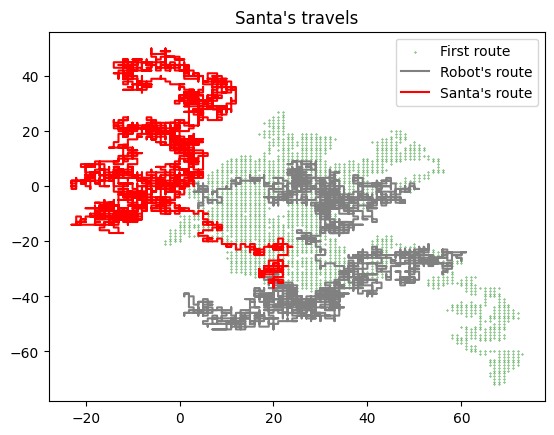

In [62]:
import matplotlib.pyplot as plt
# 2015/3 plotting
plt.scatter([r.real for r in first],[r.imag for r in first],c='g',marker='.',s=0.4,label="First route")
plt.plot([r.real for r in rviz],[r.imag for r in rviz],'grey',label="Robot's route")
plt.plot([r.real for r in sviz],[r.imag for r in sviz],'r',label="Santa's route")
plt.title("Santa's travels")
plt.legend()
print('{:2.2f}% overlap between robot & santa '.format((len(set(set(rviz)&set(sviz))))/len(set(rviz)| set(sviz))*100.))

set1 =  set(first)
set2 =set(set(rviz)| set(sviz))
print('Only {:2.2f}% overlap between first route and second route '.format((len(set1 & set2))/len((set(set1)| set(set2)))*100.))

In [7]:
file = open("input2015_6_preprocessed.txt",'r')

alist=file.readlines()  # Returns a list object
file.close


<function TextIOWrapper.close()>

14110788.0


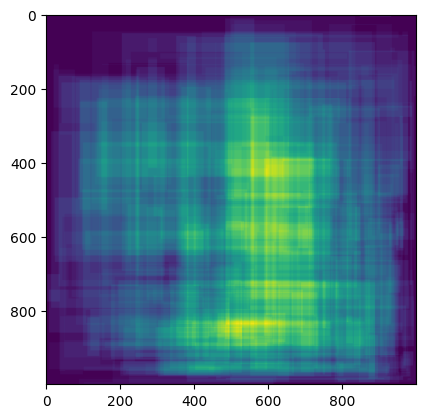

In [44]:
actionlist,coordslist= [],[]

for line in alist:
    [action, xmin,ymin,xmax,ymax]= line.split(sep=',')
    ymax = ymax[:-1]
    actionlist.append(action)
    coordslist.append([int(xmin),int(ymin),int(xmax),int(ymax)])

import numpy as np
grid =np.zeros([1000,1000])
import matplotlib.pyplot as plt
plt.imshow(grid)

for n,action in enumerate(actionlist):
    [ xmin,ymin,xmax,ymax]= coordslist[n]
    if action == "ON":
        grid[xmin:xmax+1,ymin:ymax+1] += 1
    elif action == "OFF":
        grid[xmin:xmax+1,ymin:ymax+1] -= 1
        grid[grid==-1]=0
    else:
        grid[xmin:xmax+1,ymin:ymax+1] += 2
plt.imshow(grid)
print (np.sum(np.sum(grid)))

In [37]:
from py2opt.routefinder import RouteFinder

#FNTZBDMS
cities_names = ["Faerun",
"Norrath",
"Tristram",
"AlphaCentauri",
"Arbre",
"Snowdin",
"Tambi",
"Straylight"]

import copy
dist_mat_ORIG = [[0,	129,	58,	13,	24,	60,	71,	67],[
129,	0,	142,	15,	135,	75,	82,	54],[
58,	142,	0,	118,	122,	103,	49,	97],[
13,	15,	118,	0,	116,	12,	18,	91],[
24,	135,	122,	116,	0,	129,	53,	40],[
60,	75,	103,	12,	129,	0,	15,	99],[
71,	82,	49,	18,	53,	15,	0,	70],[
67,	54,	97,	91,	40,	99,	70,	0]]

import numpy as np
distances, routes= [] ,[]
for c,startcity in enumerate(cities_names):
    
    
        
    for n in range(len(dist_mat_CLEAN)):
            for m in range(len(dist_mat_CLEAN[0])):
                dist_mat_CLEAN = copy.deepcopy( dist_mat_ORIG)
                dist_mat_CLEAN[n][m] = 0

                route_finder = RouteFinder(dist_mat_CLEAN, cities_names, iterations=50)
                distance, route = route_finder.solve()

                distances.append(distance)
                routes.append(route)


0 msec
1 msec
1 msec
1 msec
1 msec
1 msec
1 msec
1 msec
2 msec
2 msec
2 msec
2 msec
2 msec
2 msec
3 msec
3 msec
3 msec
3 msec
3 msec
3 msec
4 msec
4 msec
4 msec
4 msec
4 msec
5 msec
5 msec
5 msec
5 msec
6 msec
6 msec
6 msec
6 msec
6 msec
6 msec
7 msec
7 msec
7 msec
7 msec
7 msec
7 msec
8 msec
8 msec
8 msec
8 msec
8 msec
8 msec
8 msec
9 msec
9 msec
0 msec
0 msec
0 msec
0 msec
1 msec
1 msec
1 msec
1 msec
1 msec
1 msec
1 msec
2 msec
2 msec
2 msec
2 msec
2 msec
2 msec
2 msec
3 msec
3 msec
3 msec
3 msec
3 msec
3 msec
3 msec
3 msec
4 msec
4 msec
5 msec
5 msec
5 msec
5 msec
5 msec
5 msec
5 msec
6 msec
6 msec
6 msec
6 msec
6 msec
6 msec
6 msec
7 msec
7 msec
7 msec
7 msec
7 msec
8 msec
8 msec
8 msec
0 msec
0 msec
0 msec
1 msec
1 msec
1 msec
1 msec
1 msec
1 msec
2 msec
2 msec
2 msec
2 msec
2 msec
2 msec
3 msec
3 msec
3 msec
3 msec
3 msec
3 msec
4 msec
4 msec
4 msec
4 msec
4 msec
5 msec
5 msec
5 msec
5 msec
5 msec
6 msec
6 msec
6 msec
6 msec
6 msec
6 msec
7 msec
7 msec
7 msec
7 msec
7 msec
7 msec

In [38]:
print(min(distances))

155.0


In [39]:
routes[distances==min(distances)]

['Faerun',
 'Arbre',
 'Straylight',
 'Norrath',
 'AlphaCentauri',
 'Snowdin',
 'Tambi',
 'Tristram']

In [2]:
!pip install py2opt

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for random2: filename=random2-1.0.1-py3-none-any.whl size=12062 sha256=247d37d57abf115a5a65226573a831c843ec1c2f00f421d085e3964f07815d90
  Stored in directory: c:\users\joachim.verhelst\appdata\local\pip\cache\wheels\ed\ab\52\530190a86c8147f3d39a9f575cfe9eadc25bf8fbc6d57807e3
Successfully built random2


The system cannot find the path specified.
